In [ ]:
#Instalar Folium para el mapa
!pip install folium

In [ ]:
#Dependencias
import pandas as pd #(para manipular datos)
import numpy as np #(para operaciones numericas)
import matplotlib.pyplot as plt #(para graficos)
import seaborn as sns #(para graficos mejorados)
import folium #(para mapas)

#0. Uso Pandas para Leer el archivo

In [ ]:
#Leer el archivo
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')

In [ ]:
#Creo un mapa de California que usare como base, esto fue hecho al final de todo, no fue el inicio.
mapa = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

#1.0 Exploracion Inicial

In [ ]:
#Para ver sus 5 primeras lineas
df.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Aqui puedo observar que el df cumple extrictamente con la descripcion de la pagina de origen y tiene las siguientes caracteristicas:


*   Tiene 10 columnas + index(Indice)
*   Las columnas estan descritas de la siguiente manera:

  1. longitude: A measure of how far west a house is; a higher value is farther west

  2. latitude: A measure of how far north a house is; a higher value is farther north

  3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

  4. totalRooms: Total number of rooms within a block

  5. totalBedrooms: Total number of bedrooms within a block

  6. population: Total number of people residing within a block

  7. households: Total number of households, a group of people residing within a home unit, for a block

  8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

  9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

  10. oceanProximity: Location of the house w.r.t ocean/sea

## 1.1Radiografia de los datos






In [ ]:
#Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


1.   Los datos en su mayoria estan completos, la columna Non-Null Count muestra el mismo numero en todas las filas.
2.   Tiene 20640 filas, y bajo el esquema que esta que es formato ancho eso significa que cada variable tiene esa cantidad de datos (entradas).
3.   Todos los datos son de tipo float, eso es conveniente y facil de manejar, implica que solo tengo una variable categorica, (ocean_proximity).
4.   La excepcion es la fila del (total_bedrooms), por lo visto hay bloques no tienen el numero total de habitaciones. (TODO #1)

##1.2 (TODO #1) Exploracion de Nulos

Saber si hay valores nulos me permite verificar mejor los datos

In [ ]:
#Ver resumen por columna
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

Se confirma lo visto preliminarmente en el bloque anterior. En total_bedrooms hay valores nulos. (total_bedrooms)

In [ ]:
#Sumo los valores nulos
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Los valores nulos concentrados en la variable del total de las habitaciones (total_bedrooms) son 207. Tomando en cuenta que estamos hablando de 20.000 datos aproximadamente, esto representa el 1% de los datos.

Se pueden simplemente eliminar los valores sin embargo y tomando en cuenta que es el unico punto en el cual hay valore nulos, lo voy a explorar un poco mas.
(TODO #2) Ver Nulos mas a profundidad

###1.2.1 (TODO #2) Ver mas a profundidad los valores nulos


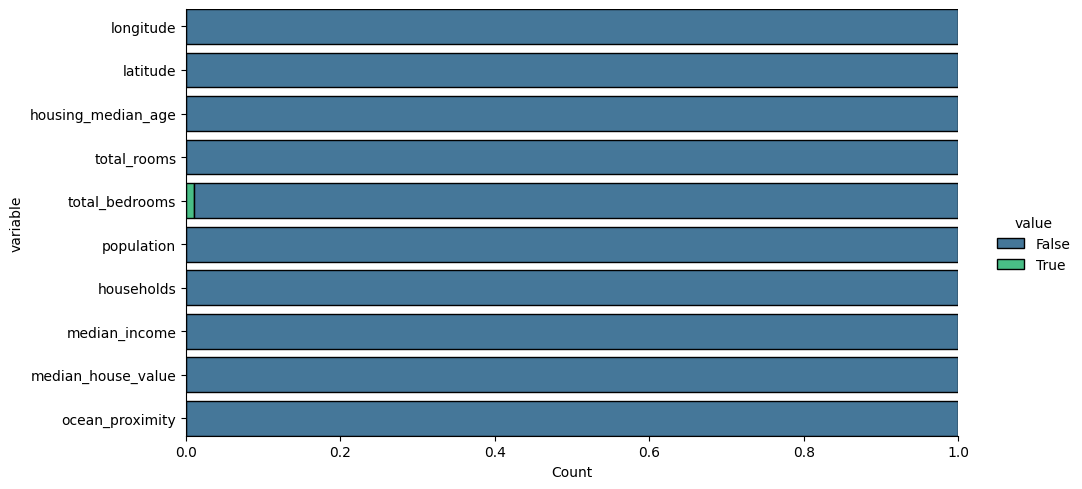

In [ ]:
#Grafico la proporcion de nulos, referente al toral
(
    df.isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y= 'variable',
                hue= 'value',
                multiple= 'fill',
                aspect= 2,
                kind= 'hist',
                stat= 'count',
                common_norm= False,
                shrink= .8,
                alpha= .9,
                fill= True,
                edgecolor= 'k',
                linewidth= 1,
                log_scale= True,
                palette= 'viridis',
                legend= True,
                height= 5
            )
        )
    )
)

Se puede confirmar el numero exacto de los datos faltantes en el numero de habitaciones (total_bedrooms) que es de 207 bloques que no tienen ese dato. Tomando en cuenta que son unos 20000 bloques eso es aprox. 1%.

**Acciones**: Rellenar con algun valor mediana o estimacion, probablemente sea una estimacion tomando en cuenta que tengo muchos datos completos que estan estrechamente relacionados; total_rooms, population, households.

###1.2.2 Hipotesis: los valores nulos estan todos en una zona en particular en la cual no se recolectaron esos datos.
Quiero verificar primero donde estan esas 207 bloques a los que les falta el dato de (total_bedrooms), la hipotesis que tengo es que los puntos faltantes corresponden todos a una zona en especifico, eso lo podre ver en el mapa.

In [ ]:
#Filtro el DF para quedarme solo con los valores nulos y ver donde estan
df_faltantes = df[df['total_bedrooms'].isnull()]
display(df_faltantes)
print(len(df_faltantes))

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
...               ...  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

207


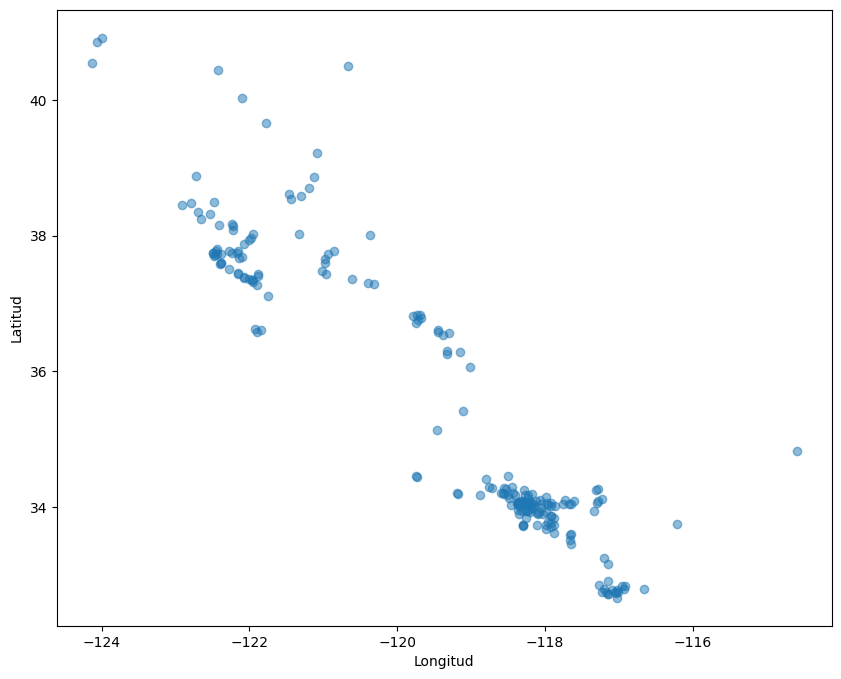

In [ ]:
#Pruebo para visualizar puntos en el Mapa
#Intento hacer un scatter plot que muestre donde estan ubicados geograficamente los 207 bloques con datos faltantes
plt.figure(figsize=(10, 8))
plt.scatter(df_faltantes['longitude'], df_faltantes['latitude'], alpha=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Viendo el mapa se puede observar que los bloques con datos faltantes estan en realidad dispersos en toda california. No solo en un punto.

## 1.3 Completado de Nulos

Ahora que vi que estan dispersos, continuo con el rellenado de los datos faltantes.


*   Primero determino la correlacion del total de habitaciones (total_bedrooms) con variables como hauseholds, population y total_rooms.




In [ ]:
#Correlaciones
df[['households', 'population', 'total_rooms', 'total_bedrooms']].corr()['total_bedrooms']

households        0.979728
population        0.877747
total_rooms       0.930380
total_bedrooms    1.000000
Name: total_bedrooms, dtype: float64

A partir de las correlaciones se pueden determinar que:


*   total_bedrooms tiene una correlacion alta con Households y total_rooms
*   Conceptualmente diria que deberia estar mas relacionada con total_rooms, porque al final es un subconjunto de esta.
*   Los numeros indican, sin embargo que con households la correlacion es mas alta.

Elijo hacer la correlacion basado en el numero de **households**

###1.3.1 Calculos para completar nulos

In [ ]:
#Numero total de households
total_households = df['households'].sum()

#Numero total de habitaciones
total_habitaciones = df['total_bedrooms'].sum()

#Numero total de espacios
total_espacios = df['total_rooms'].sum()

print(f'El numero total de households es: {total_households}')
print(f'El numero total de habitaciones es: {total_habitaciones}')
print(f'El numero total de espacios es: {total_espacios}')

El numero total de households es: 10310499.0
El numero total de habitaciones es: 10990309.0
El numero total de espacios es: 54402150.0


In [ ]:
#Calculo la proporcion entre el total_bedrooms y el numero de households, en los bloques que tienen los datos completos.
df_completos = df[df['total_bedrooms'].notnull()]

#Calculo la proporcion para cada bloque
proporcion = df_completos['total_bedrooms'] / df_completos['households']
print(proporcion)


#Calculo la mediana y el promedio
mediana = proporcion.median()
promedio = proporcion.mean()

print(f'La mediana es: {mediana}')
print(f'El promedio es: {promedio}')

0        1.023810
1        0.971880
2        1.073446
3        1.073059
4        1.081081
           ...   
20635    1.133333
20636    1.315789
20637    1.120092
20638    1.171920
20639    1.162264
Length: 20433, dtype: float64
La mediana es: 1.048888888888889
El promedio es: 1.0970623858069952


En este caso para hacer el calculo y completar los datos de numero de habitaciones, total_bedrooms utilizare la mediana, porque me da un valor mas robusto y va en linea con el criterio que utiliza la base de datos.


###


### 1.3.2 Momento de completar los datos faltantes.



*   Obtengo un data frame con solo los bloques a los que les faltan estos datos.
*   Multiplico el valor existente de households de cada bloque por la mediana.
*   El resultado de la multiplicacion anterior utilizo como valor del total_bedrooms de cada bloque.



In [ ]:
#DF con los bloques incompletos.
df_incompletos = df[df['total_bedrooms'].isnull()]

#Multiplico en cada caso mediana y households
df_total_rooms = df_incompletos['households'] * mediana


#Ahora completo en el df original aprovechando que la serie df_total_rooms coincide en indices con la original.
df_completada = df.fillna(value={'total_bedrooms': df_total_rooms})

# Cuenta cuántos nulos quedan
df_completada['total_bedrooms'].isnull().sum()

np.int64(0)

Se nota al hacer la suma de los nulos, que se completaron los datos faltantes del df original.

In [ ]:
#Verificacion adicional

# Muestra algunos valores de los que fueron rellenados
df_completada.loc[df_total_rooms.index, 'total_bedrooms'].head(10)

290      228.657778
341      271.662222
538     1335.235556
563      153.137778
696      168.871111
738      584.231111
1097     629.333333
1350    1061.475556
1456     566.400000
1493     523.395556
Name: total_bedrooms, dtype: float64

##1.4 Determinacion de valores duplicados
tomando en cuenta que cada fila/bloque representa un distrito, no una manzana, no una cuadra. Es extremadamente dificil que dos bloques tengan los mismos valores. Es decir, numero de households, population, etc. Por ende en caso de encontrar este tipo de casos se debe a un error en la carga de datos.


In [ ]:
#Utilizo el metodo duplicated y sumo para obtener los duplicados
df_completada.duplicated().sum()

np.int64(0)

Se observa 0 en el resultado, quiere decir que la base de datos no tiene ningun duplicado.

##1.5 Evaluamos Valores atipicos


### 1.5.1 Primero a partir de la visualizacion.

<Axes: >

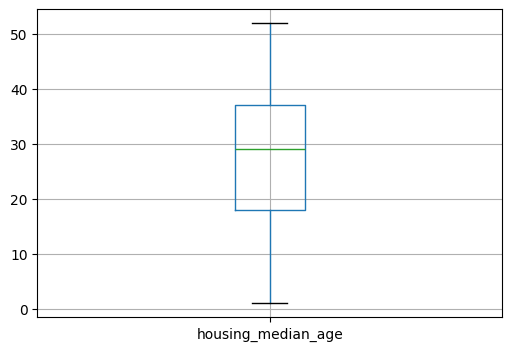

In [ ]:
#housing_median_age
plt.figure(figsize=(6, 4))
df_completada.boxplot(column=['housing_median_age'])

No se observan outliiers en este caso. (housing_median_age)

<Axes: >

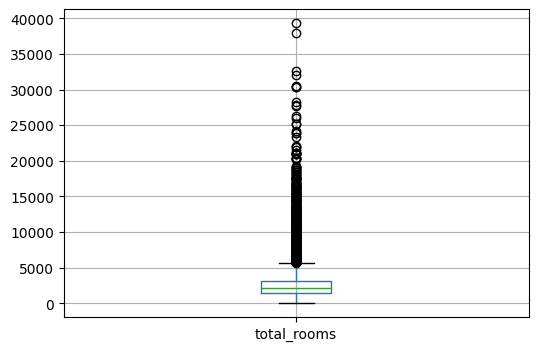

In [ ]:
# total_rooms
plt.figure(figsize=(6,4))
df_completada.boxplot(column=['total_rooms'])

Se observan outliers aqui pero al ser distritos tiene sentido que cada en zonas muy pobladas haya espacios muy densos que no correspondan con la mayoria de distritos rurales y menos poblados.

Para confirmar mi hipotesis graficare los outliers y vere si corresponden con ciudades.

In [ ]:
#Calculo primero los Cuartiles
Q1 = df_completada['total_rooms'].quantile(0.25)
Q3 = df_completada['total_rooms'].quantile(0.75)

print(f'el primer cuartil es: {Q1}' f' y el tercer cuartil es: {Q3}')


el primer cuartil es: 1447.75 y el tercer cuartil es: 3148.0


In [ ]:
#Con lo anterior puedo calcular el IQR
  #El IQR basicamente me ayuda a ver que tan dispersos estan los datos.
IQR = Q3 - Q1
print(f'El IQR es: {IQR}')

El IQR es: 1700.25


In [ ]:
#Paso ahora a calcular el limite superior para poder filtrar lo que este por encima como outliers
limite_superior = Q3 + (1.5*IQR)
print(f'El limite superior es: {limite_superior}')

El limite superior es: 5698.375


In [ ]:
#Calculo los outliers de total_rooms
df_outliers = df_completada[df_completada['total_rooms'] > limite_superior]
print(f'son {(len(df_outliers))} outliers')
df_outliers.dtypes


son 1287 outliers


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

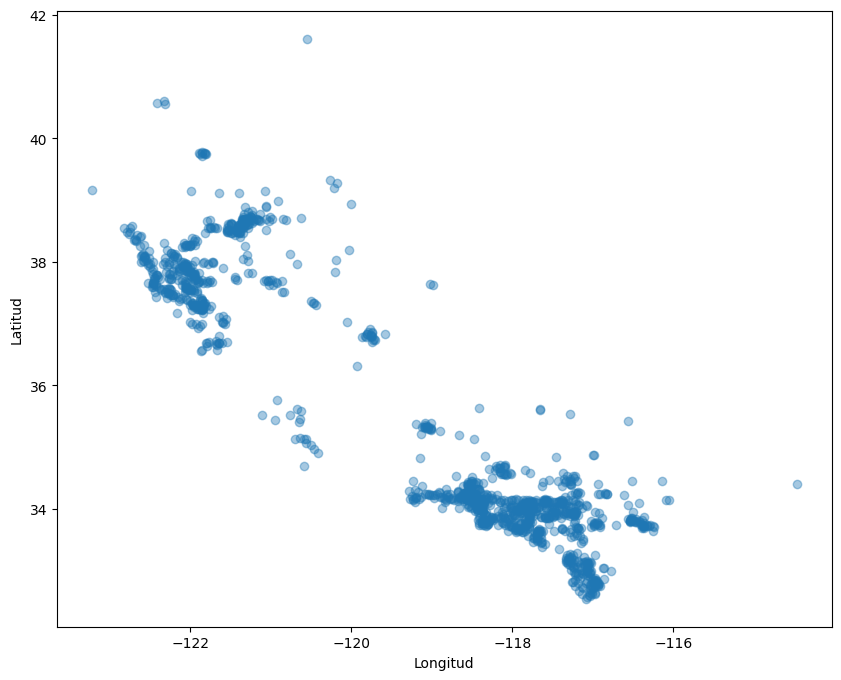

In [ ]:
#Finalmente grafico los Outliers
plt.figure(figsize=(10, 8))
plt.scatter(df_outliers['longitude'], df_outliers['latitude'], alpha=0.4)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [ ]:
#Ingreso estos puntos en el mapa de california para tener una mejor visual.
#Agregar cada punto del outlier
for _, row in df_outliers.iterrows():
  folium.CircleMarker(
      location=[row['latitude'], row['longitude']],
      radius=0.01,
      color='red',
      fill=False,
  ).add_to(mapa)
display(mapa)

Se observa que coincide perfectamente con la ubicacion de la ciudades, quiere decir que los outliers solo representan zonas densamente pobladas.

<Axes: >

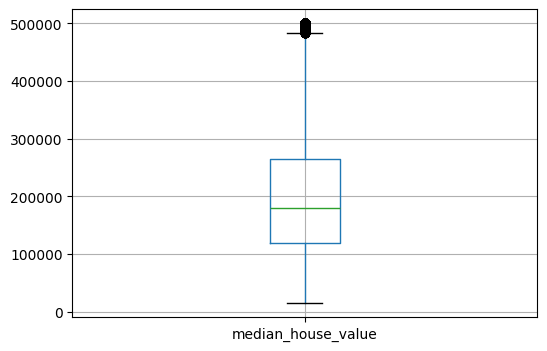

In [ ]:
#median_house_value

plt.figure(figsize=(6,4))
df_completada.boxplot(column=['median_house_value'])

El grupo de outliers que se observa en el limite superior puede ser perfectamente explicado por casas de alto costo que escapan de los parametros de el promedio y la mayoria de las casas.

No se observan valores negativos.

### 1.5.2 Busco en la variable de la cantidad de poblacion (population)

<Axes: >

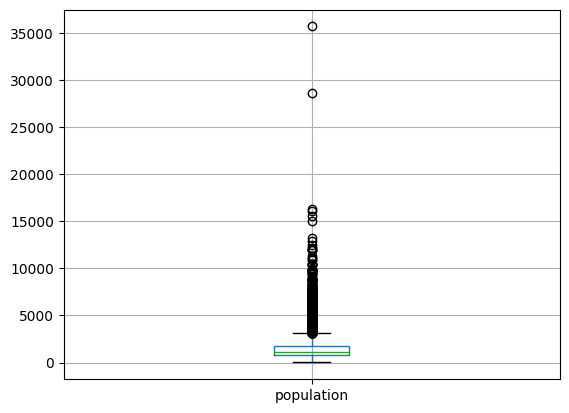

In [ ]:
#Population
df_completada.boxplot(column=['population'])

No tiene mucho sentido lo que pasa en esta variable, hay que buscarle una explicacion.

### 1.5.3.- Buscar si hay valores negaticos sin sentido

In [ ]:
#Buscando valores negativos
(df_completada.select_dtypes(include=np.number) < 0).sum()

longitude             20640
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
dtype: int64

Solo se observan valores negativos en la longitud, lo cual es totalmente normal por ser una coordenada.

## 1.6 Validacion de la Muestra

Procedo a sumar toda la poblacion, esta sumatoria me permitira saber el porcentaje de la poblacion que esta aqui representado.

In [ ]:
#total de la poblacion
poblacion_total = df_completada['population'].sum()
print(f'El total de la poblacion es {poblacion_total} personas')

El total de la poblacion es 29421840.0 personas


En base a los datos de California para el año 1990, para ese año tenian 29 millones de personas, esto coincide con el numero encontrato en los datos y sugiere que esta base de datos representa el 100% de las casas para ese momento.

###

# 2.0 Exploracion por variables
Ahora explorare variables de manera separada.


##2.1 Histogramas

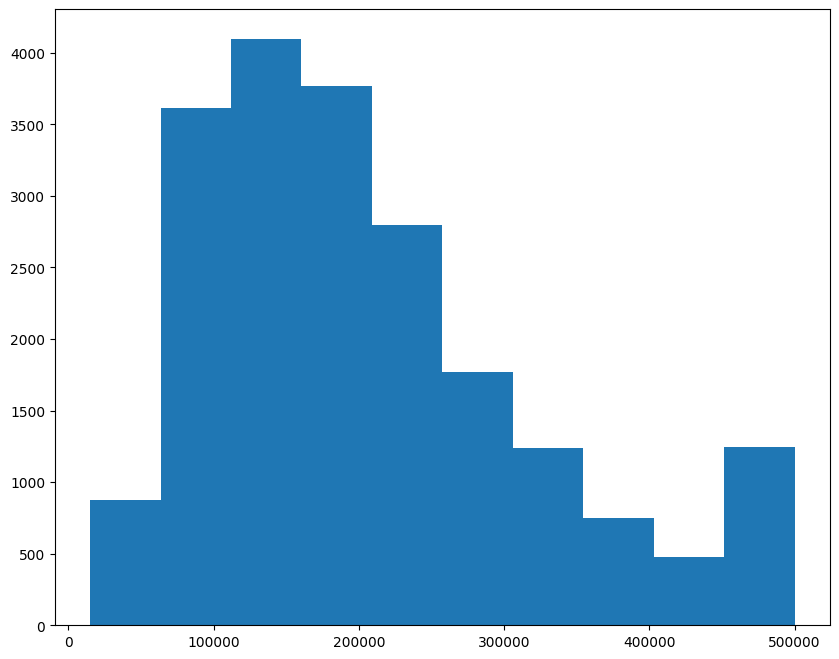

In [ ]:
#Histograma de la median_house_value
plt.figure(figsize=(10,8))
plt.hist(df_completada['median_house_value'])
plt.show()


Se observa una distribucion anormal de bloques de casas a la derecha con precio de USD 500000, lo cual presume que los bloques con media de casas a mas de USD 5000000 fueron todas puestas con ese valor como maximo.

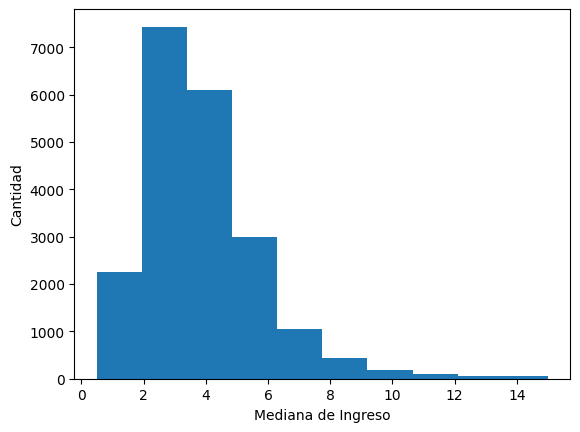

In [ ]:
#Histograma de la median_income

plt.hist(df_completada['median_income'])
plt.xlabel('Mediana de Ingreso')
plt.ylabel('Cantidad')
plt.show()

Se observa una distribucion normal en el median_income, lo cual refleja lo esperado y es que el grueso de las familias este en el ingreso medio.

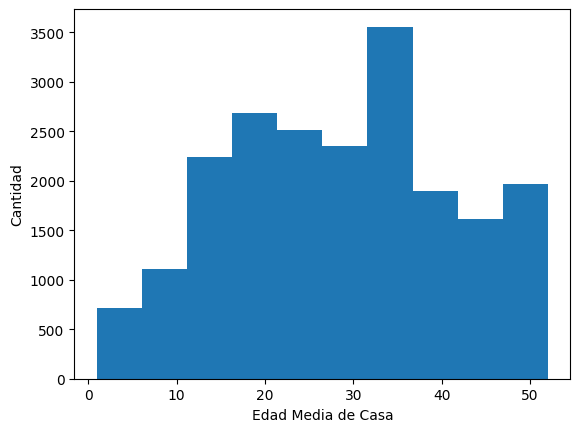

In [ ]:
#Histograma de housin_median_age, la edad media de una casa en un bloque
plt.hist(df_completada['housing_median_age'])
plt.xlabel('Edad Media de Casa')
plt.ylabel('Cantidad')
plt.show()

Tambien en la edad media de las casas se puede ver una columna con el maximo de edad, probablmente las casas de mas de 50 anhos, fueron llevadas todas a 52.

# 3.0 Exploracion de Relaciones entre Variables

##3.1 Afecta el ingreso mediano al precio de las casas?

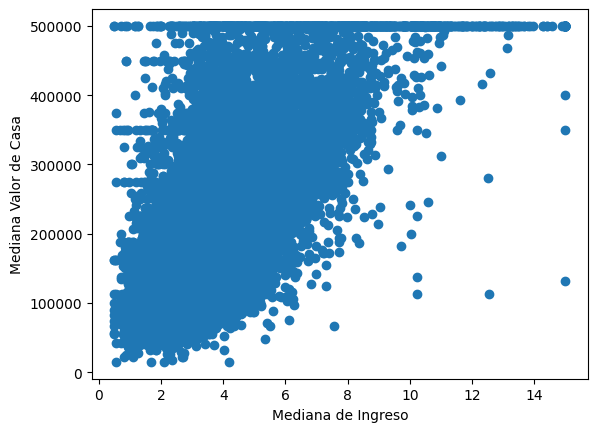

In [ ]:
plt.scatter(df_completada['median_income'], df_completada['median_house_value'])
plt.xlabel('Mediana de Ingreso')
plt.ylabel('Mediana Valor de Casa')
plt.show()



*   Se observa una ligera correlacion, es decir a mayor ingreso, mayor precio de las casas. Sin embargo hay mucha dispersion, se puede afirmar que si bien influye, no es unico factor que incide.

*   Se puede observar la linea de arriba en el precio de 500000 que representa el tope de precio dado.



## 3.2 Afecta la edad de la casas al precio?

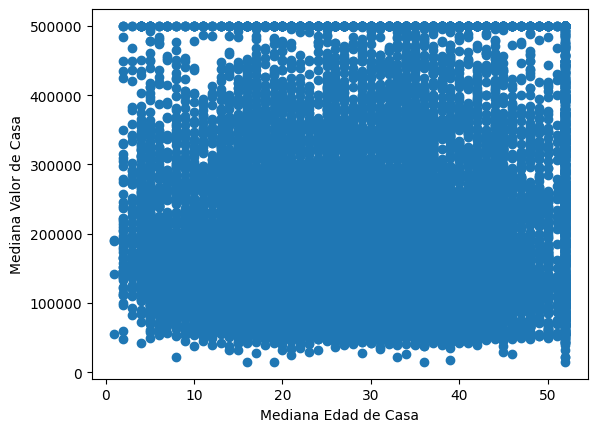

In [ ]:
#Correlaciono las variables housinMedianAge y medianHouseValue
plt.scatter(df_completada['housing_median_age'], df_completada['median_house_value'])
plt.xlabel('Mediana Edad de Casa')
plt.ylabel('Mediana Valor de Casa')
plt.show()



*   No parece que la edad incida en el precio.
*   Se ven las lineas de censura para el precio USD 500.000 y para edad 52 años



## 3.3 La cercania al oceano influye en el precio?

*   ocean_proximity
*   median_house_value



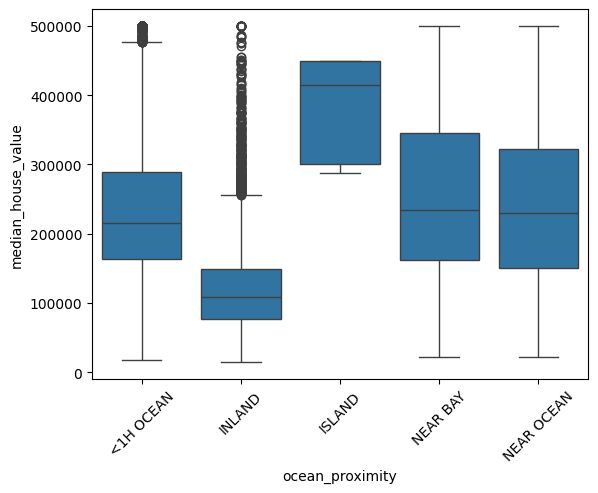

In [ ]:
sns.boxplot(data=df_completada, x='ocean_proximity', y='median_house_value')
plt.xticks(rotation=45)
plt.show()


Existe correlacion visible:

*   Se observa que las las casas en islas son las mas costosas.Con una Mediana por encima de los USD 420k
*   Tambien se aprecia claramente que las casas "Inland" tienen el menor precio de las 5 categirias. Con una Mediana ligeramente mayor a USD 100k.

*   Las diferencias son menores para las categorias "Near Bay", "1H Ocean" y "Near Ocean". Sin embargo aqui tambien se nota una correlacion con relacion a la distancia al mar, con precios mas altos respectivamente en el siguiente orden "Near Bay", "Near Ocean" y "1H Ocean".





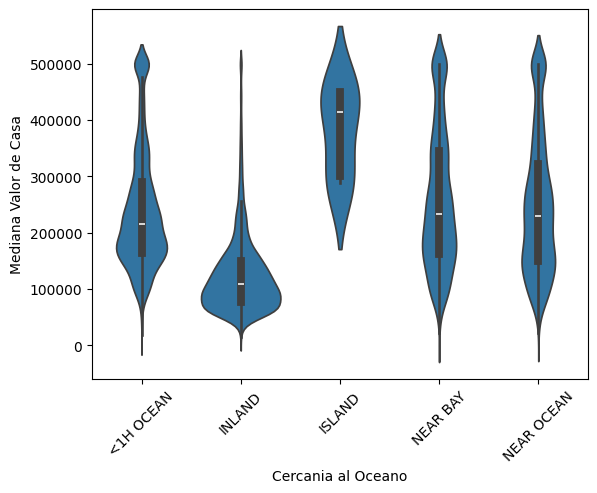

In [ ]:
sns.violinplot(data=df_completada, x='ocean_proximity', y='median_house_value')
plt.xticks(rotation=45)
plt.xlabel('Cercania al Oceano')
plt.ylabel('Mediana Valor de Casa')
plt.show()

##3.4 Afecta el ingreso medio a la cantidad de habitaciones?


*   median_income
*   total_rooms



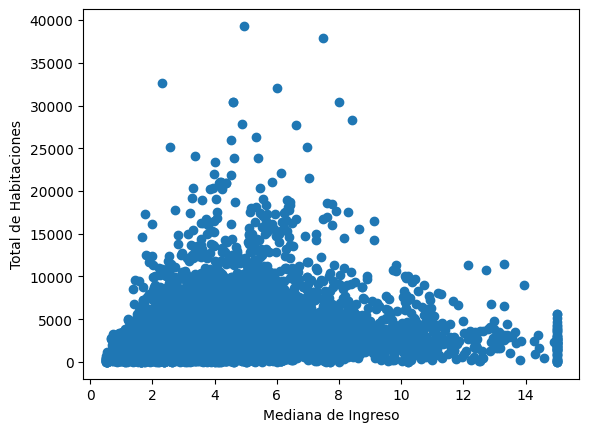

In [ ]:
#Correlaciono las variables
plt.scatter(df_completada['median_income'], df_completada['total_rooms'])
plt.xlabel('Mediana de Ingreso')
plt.ylabel('Total de Habitaciones')
plt.show()


No parece haber una correlacion clara.

# 4.0 Correlaciones
#### Ver correlaciones entre TODAS las variables numéricas a la vez
#### Valores cercanos a 1 tienen una alta correlacion positiva, cercanos a 0 no tienen ninguna correlacion y -1 tienen correlacion negativa.

In [ ]:
# Realizo la matriz
correlacion = df_completada.select_dtypes(include=[np.number]).corr()
print(correlacion)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.068321 -0.066304           -0.320453     0.929887   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068321    0.099773    0.055310      -0.015176   
latitude                 -0.066304   -0.108785   -0.071035      -0.079809   
housing_

La matriz anterior es poco intuitiva para utilizar.

##4.1 Creo un heatMap de la matriz de Correlaciones

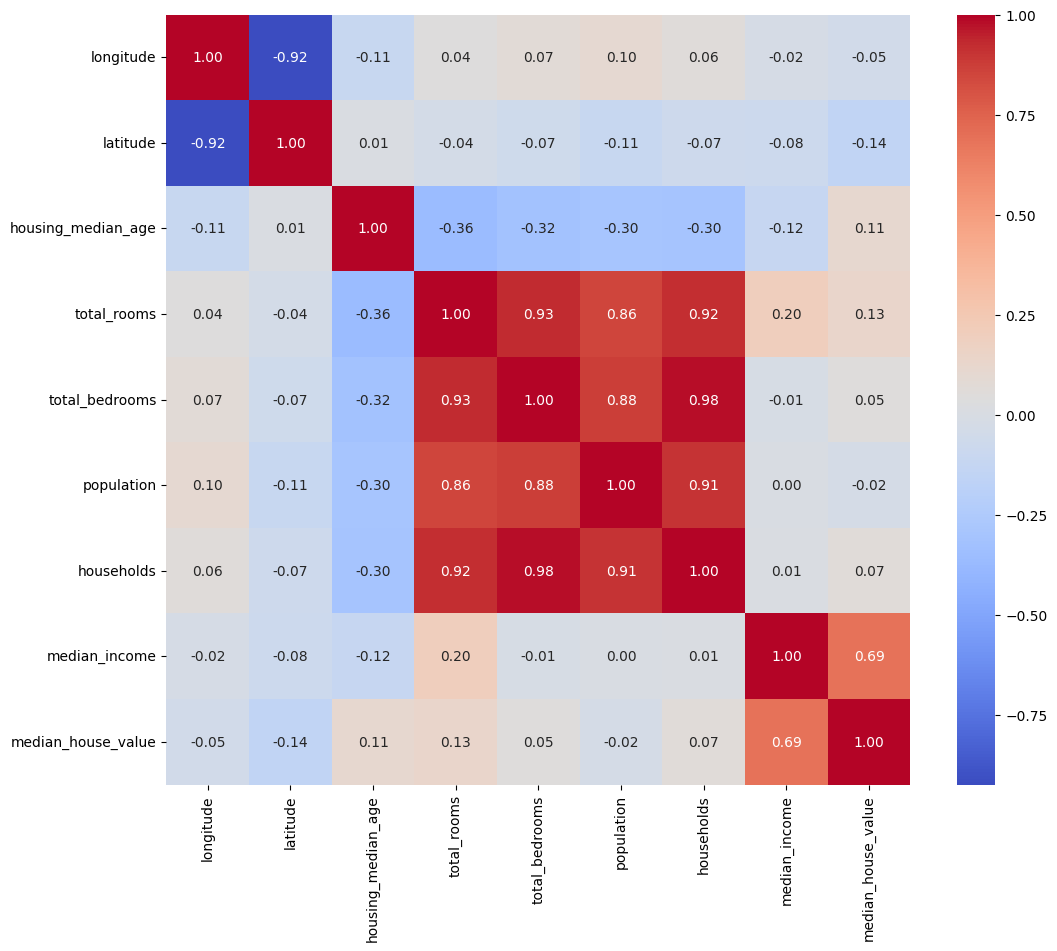

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=correlacion, annot= True, cmap='coolwarm', fmt='.2f')
plt.show()


Desde aqui se pueden observar varias correlaciones, varias esperables, otras ya confirmadas anteriormente:

*   Existe una correlacion positiva entre el ingreso y el precio de la casa.
*   Como resulta obvio la correlacion es positiva y alta entre las variables, total_rooms, total_bedrooms, population y households.
*   Se observa tambien una ligera correlacion negativa entre la edad de la casa (housing_median_age) y el nuemro de espacios de las casas (total_rooms), lo cual podria sugerir que las casas mas nuevas tienen menos espacios comparativamente con las casas mas antiguas.

## 4.2 Pairplot.

Múltiples scatter plots al mismo tiempo para ver todas las relaciones, lo hago por categorias porque asi se pueden ver mejor la correlaciones.


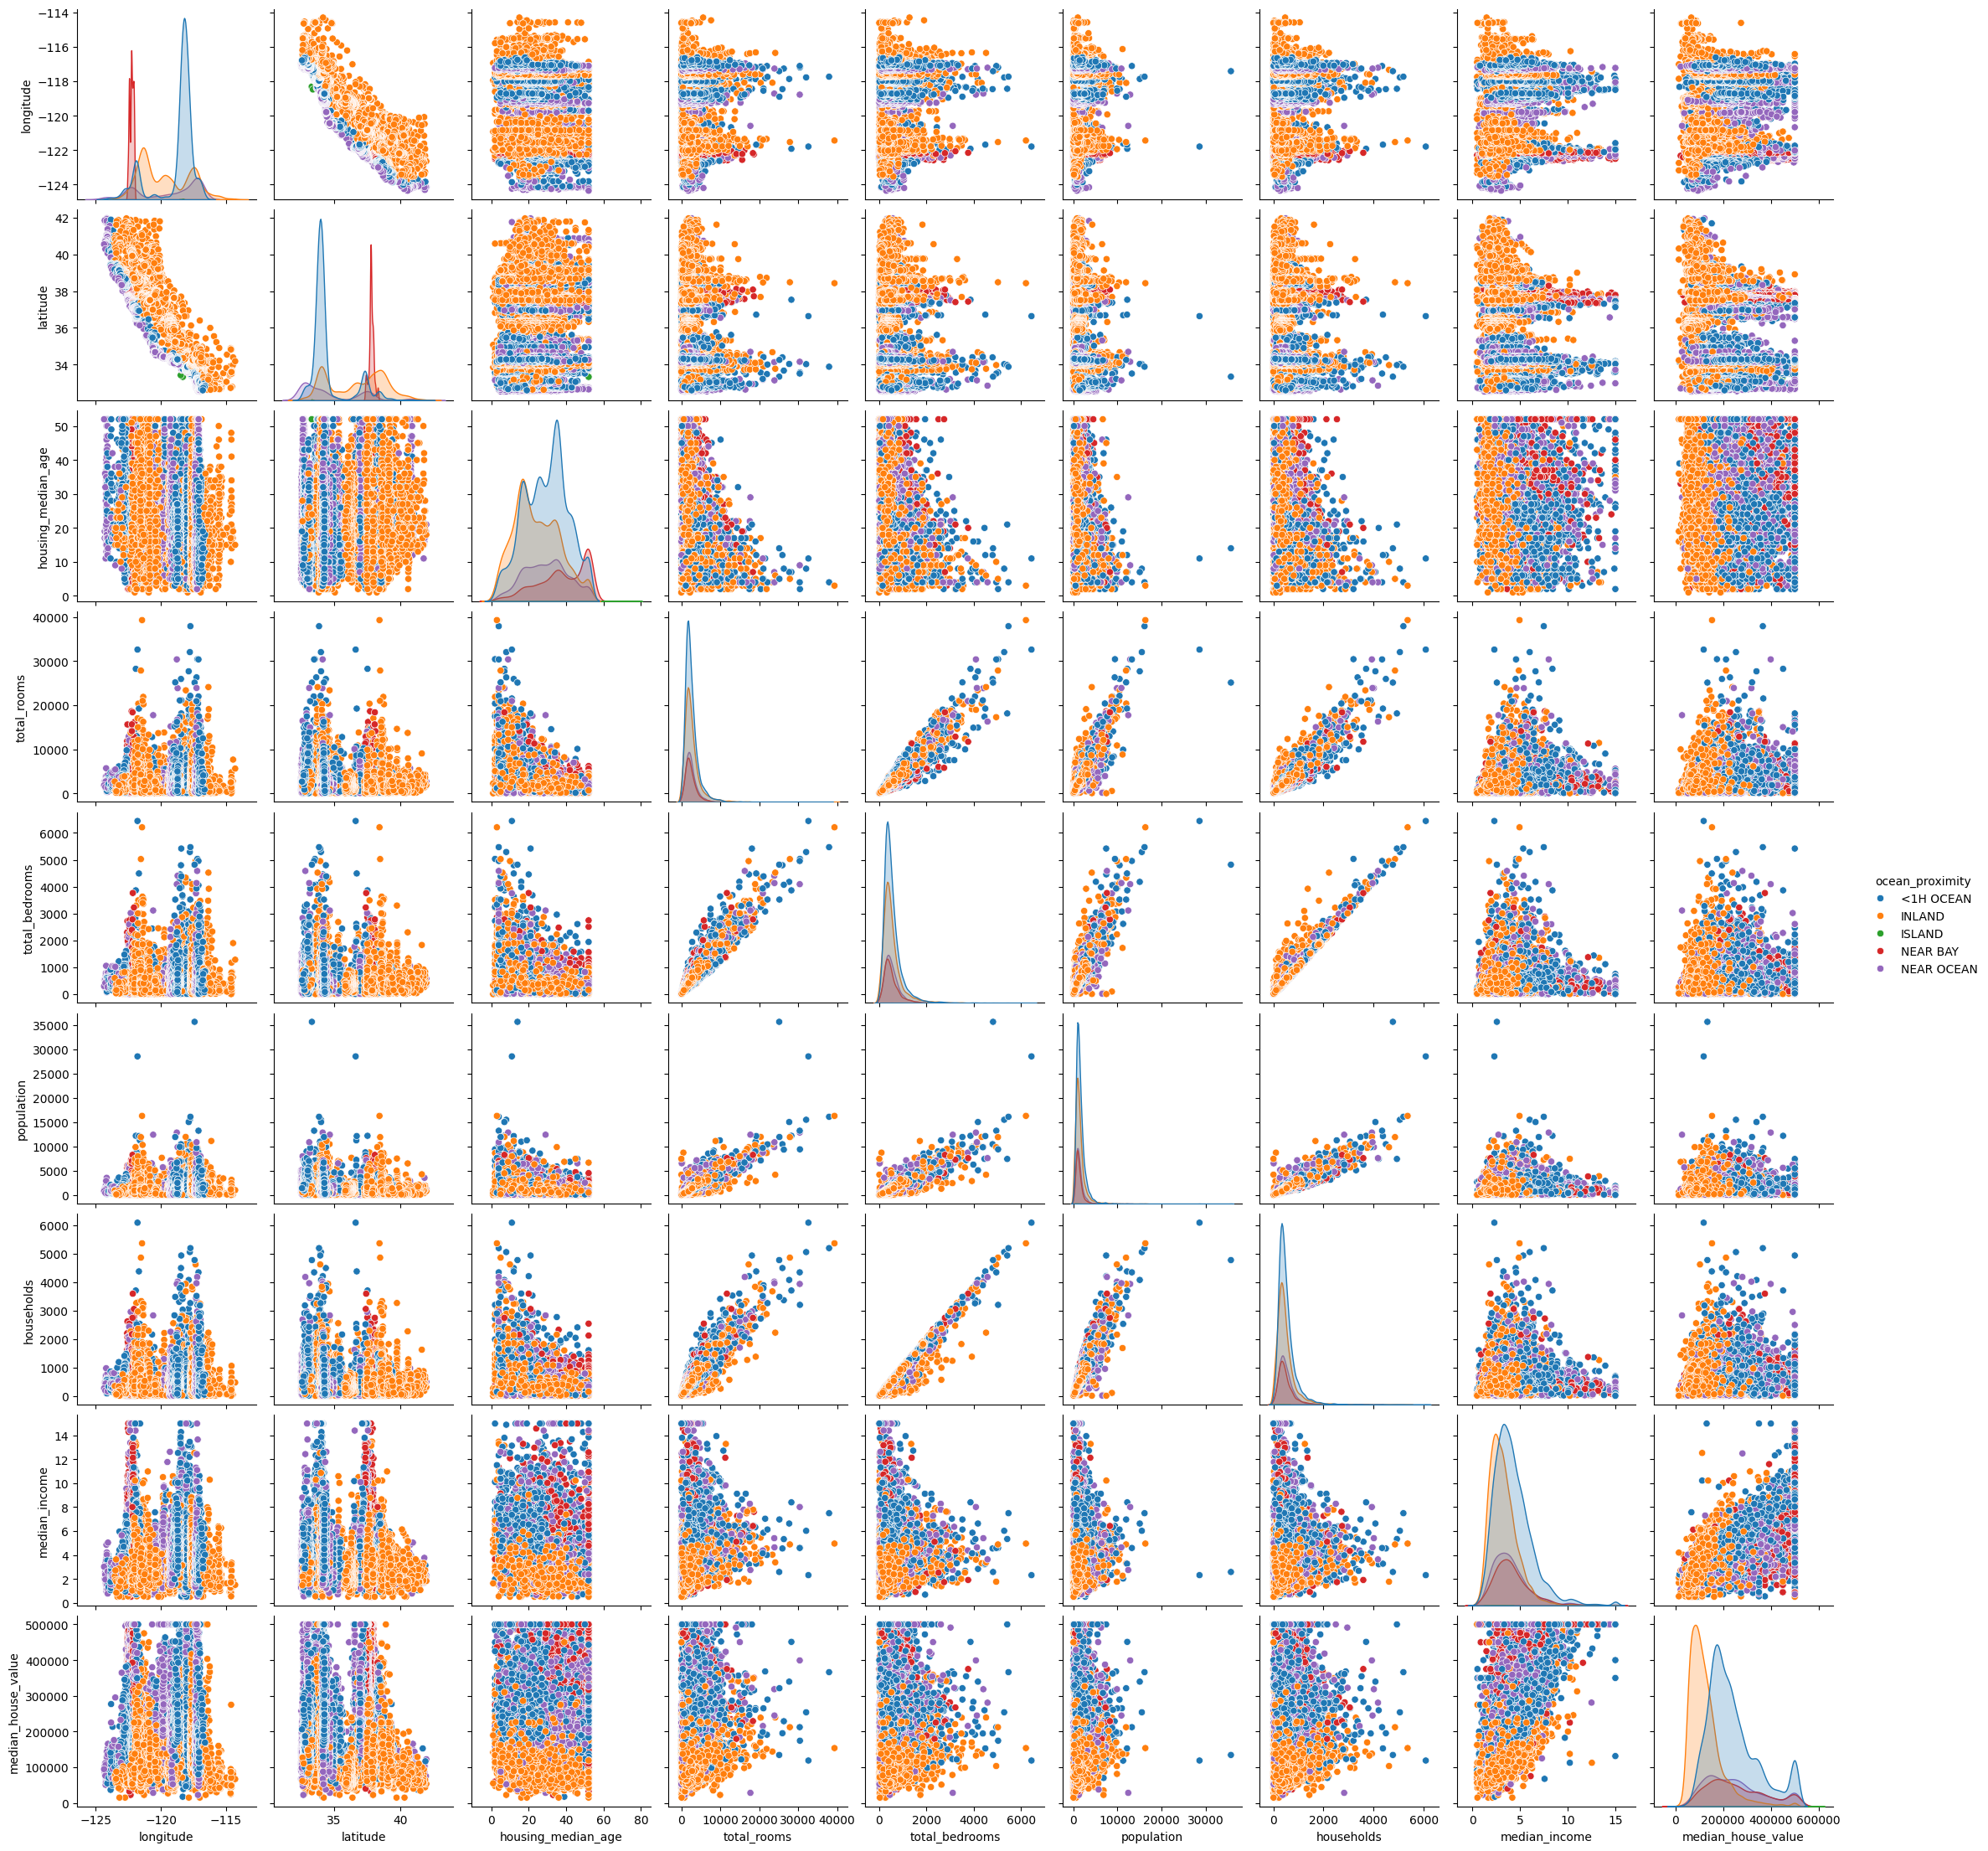

In [ ]:
#Genero el Pairplot
sns.pairplot(data=df_completada, hue='ocean_proximity')
plt.show()


Graficamente no se observan relaciones adicionales a las ya encontradas previamente.

# 5.0Datos filtrados/segmentados

Se hece filtrando segmentos de datos y aplicando a estos los parametros.

## 5.1 Relacion Edad de la Casa - Precio de la casa.

Cuando hice este analisis en general no consegui correlacion, ahora voy a intentar hacerlo con las casas con valor menor a USD 100000 y ver si afecta en este segmento la edad de la casa.

In [ ]:
# Almaceno el valor de las casas mas baratas en una nueva variable
casas_baratas = df_completada[df_completada['median_house_value']<100000]

# Total de datos que cumplen con esta condicion
print(len(casas_baratas))

3596


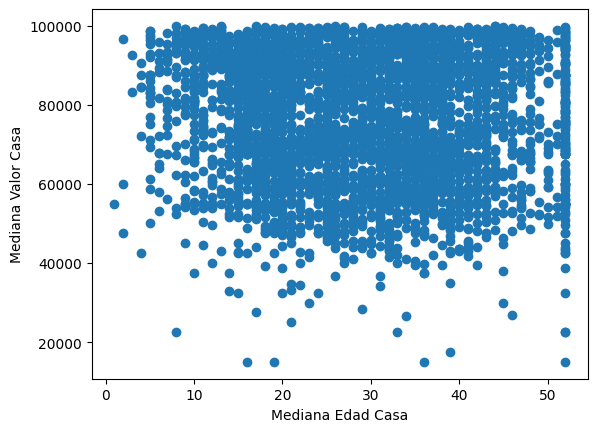

In [ ]:
# Ahora comparo
plt.scatter(casas_baratas['housing_median_age'], casas_baratas['median_house_value'])
plt.xlabel('Mediana Edad Casa')
plt.ylabel('Mediana Valor Casa')
plt.show()

No parece haber correlacion.

In [ ]:
#Intento ver si hay correlacion en las casas mas caras
casas_caras = df_completada[df_completada['median_house_value']>400000]
print(len(casas_caras))

1744


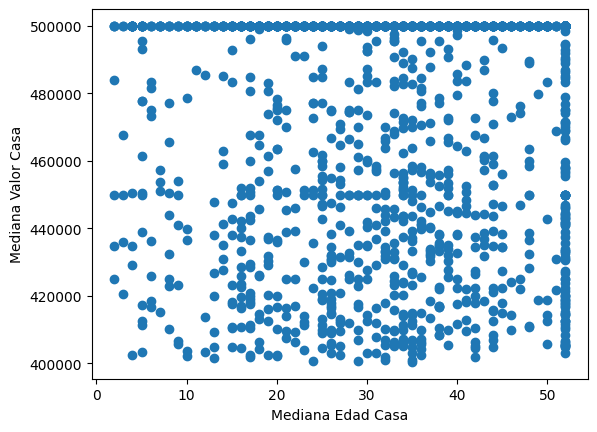

In [ ]:
plt.scatter(casas_caras['housing_median_age'], casas_caras['median_house_value'])
plt.xlabel('Mediana Edad Casa')
plt.ylabel('Mediana Valor Casa')
plt.show()

No hay correlacion

## 5.2 Analisis Geografico

Aprovechando que tengo la latitud y longitud.

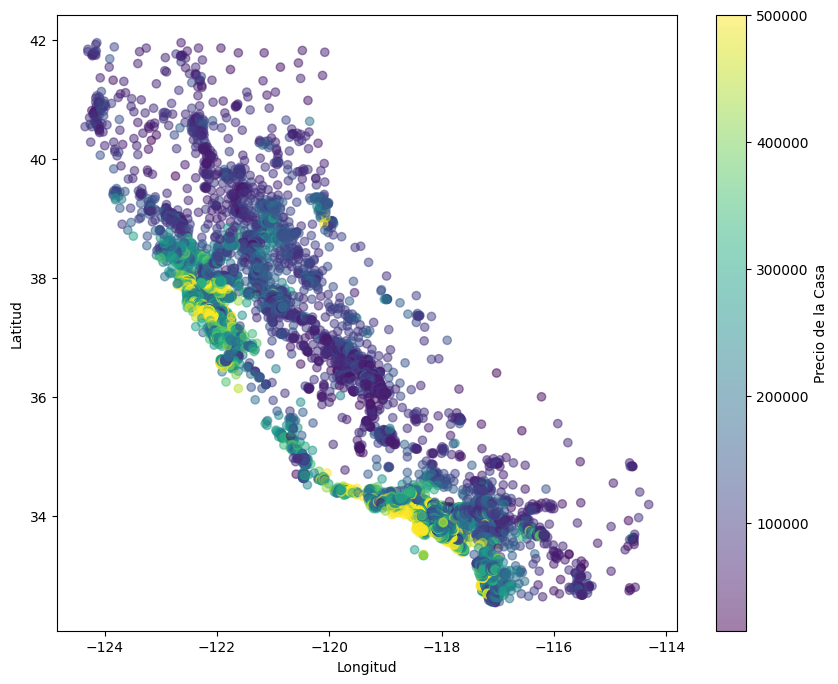

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(label ='Precio de la Casa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()



Se ve claramente el mapa de california con las zonas mas caras representadas no solo por la cercania al oceano, sino tambien por estar en las ciudades (San Francisco, Los Angeles, San Diego)

Viendo esos puntos tambien me resulta claro que no estan representadas todos los bloques de todas las casas.

#6.0 Tabulo de manera categorica
El objetivo es ver la proporcion de casas que tiene cada categoria


*   Near Bay.

*   <1H OCEAN




*   INLAND
*   NEAR OCEAN


*   ISLAND






In [ ]:
#Paso el valor que esta como objeto a categoria, esto me permitira hacer operaciones mas sencillas
df_completada['ocean_proximity'] = df_completada['ocean_proximity'].astype('category')


In [ ]:
#Hacer diagrama de frecuencias
df_completada.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

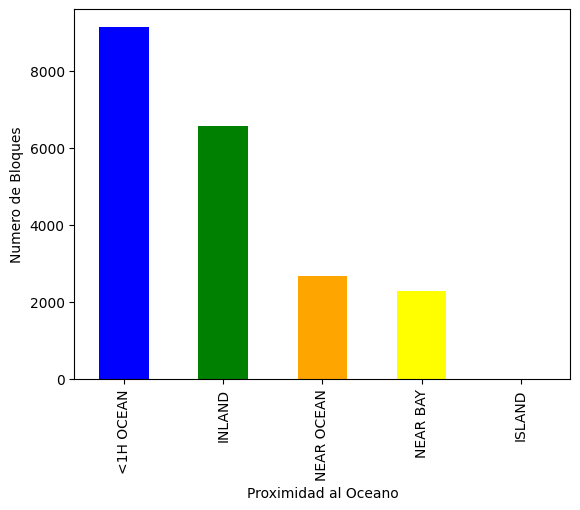

In [ ]:
#Diagrama
df_completada.ocean_proximity.value_counts().plot(
    kind='bar',
    ylabel='Numero de Bloques',
    xlabel='Proximidad al Oceano',
    color= ['blue', 'green', 'orange', 'yellow', 'red'],
    logy= False
    )
plt.show()

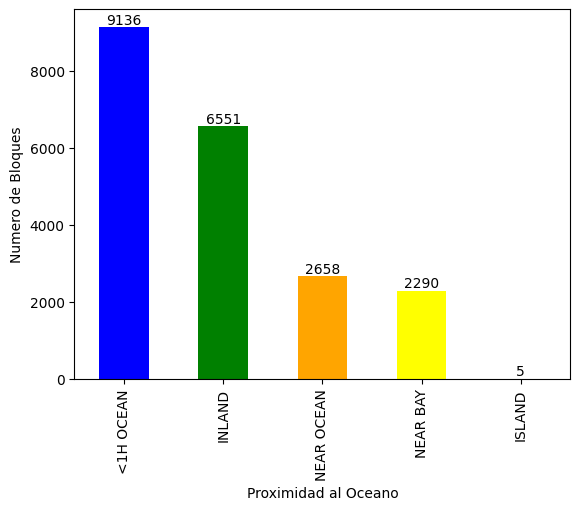

In [ ]:
ax = df_completada.ocean_proximity.value_counts().plot(
    kind= 'bar',
    ylabel= 'Numero de Bloques',
    xlabel= 'Proximidad al Oceano',
    color=['blue', 'green', 'orange', 'yellow', 'red'],
    logy= False
)
for i in ax.containers:
  ax.bar_label(i)
plt.show()

Se puede observar aqui que la mayor parte de bloques (distritos) estan en la categoria <1H OCEAN e INLAND, lo cual es totalmente logico porque la mayor proporcion del territorio del estado tiene esas caracteristicas.

<Axes: ylabel='Numero de Bloques'>

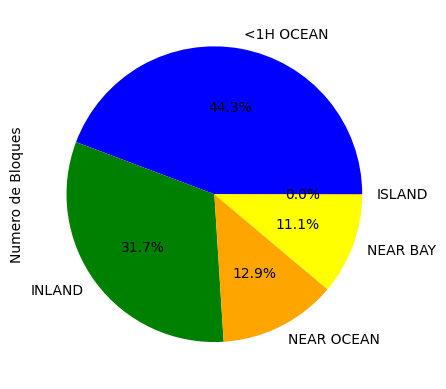

In [ ]:
#Hacer grafico de proporciones
df_completada.ocean_proximity.value_counts().plot(
    kind='pie',
    ylabel='Numero de Bloques',
    xlabel='Proximidad al Oceano',
    autopct='%1.1f%%',
    colors=['blue', 'green', 'orange', 'yellow', 'red'],
)


Los hayasgos de estas proporciones sin interesantes porque demuestran que si bien principlamente se asocia a California con las grandes ciudades sobre la costa, en realidad la mayoria de los bloques de este estudio mas del 70% estan fuera de la costa. Seria interesante ver la correlacion de esto con la poblacion.

In [ ]:
df_completada.max(numeric_only=True)

longitude               -114.3100
latitude                  41.9500
housing_median_age        52.0000
total_rooms            39320.0000
total_bedrooms          6445.0000
population             35682.0000
households              6082.0000
median_income             15.0001
median_house_value    500001.0000
dtype: float64

In [ ]:
df_completada.min(numeric_only=True)

longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.0000
total_bedrooms            1.0000
population                3.0000
households                1.0000
median_income             0.4999
median_house_value    14999.0000
dtype: float64

como es posible que haya bloques con population 3?

In [ ]:
df_completada.max(numeric_only=True) - df_completada.min(numeric_only=True)

longitude                 10.0400
latitude                   9.4100
housing_median_age        51.0000
total_rooms            39318.0000
total_bedrooms          6444.0000
population             35679.0000
households              6081.0000
median_income             14.5002
median_house_value    485002.0000
dtype: float64

In [ ]:
#Calculo de Cuartiles
df_completada['population'].quantile(0.25)

np.float64(787.0)

In [ ]:
df_completada['population'].quantile(0.75)

np.float64(1725.0)

Veo muy bajo este numero, tomando en cuenta que habia resultados de poblacion por el orden de 10000, 20000 y 30000.


In [ ]:
df_completada['population'].quantile(q=[0.25, 0.5, 0.75])

0.25     787.0
0.50    1166.0
0.75    1725.0
Name: population, dtype: float64

Estos resultados dejan demasiados valores como outliers

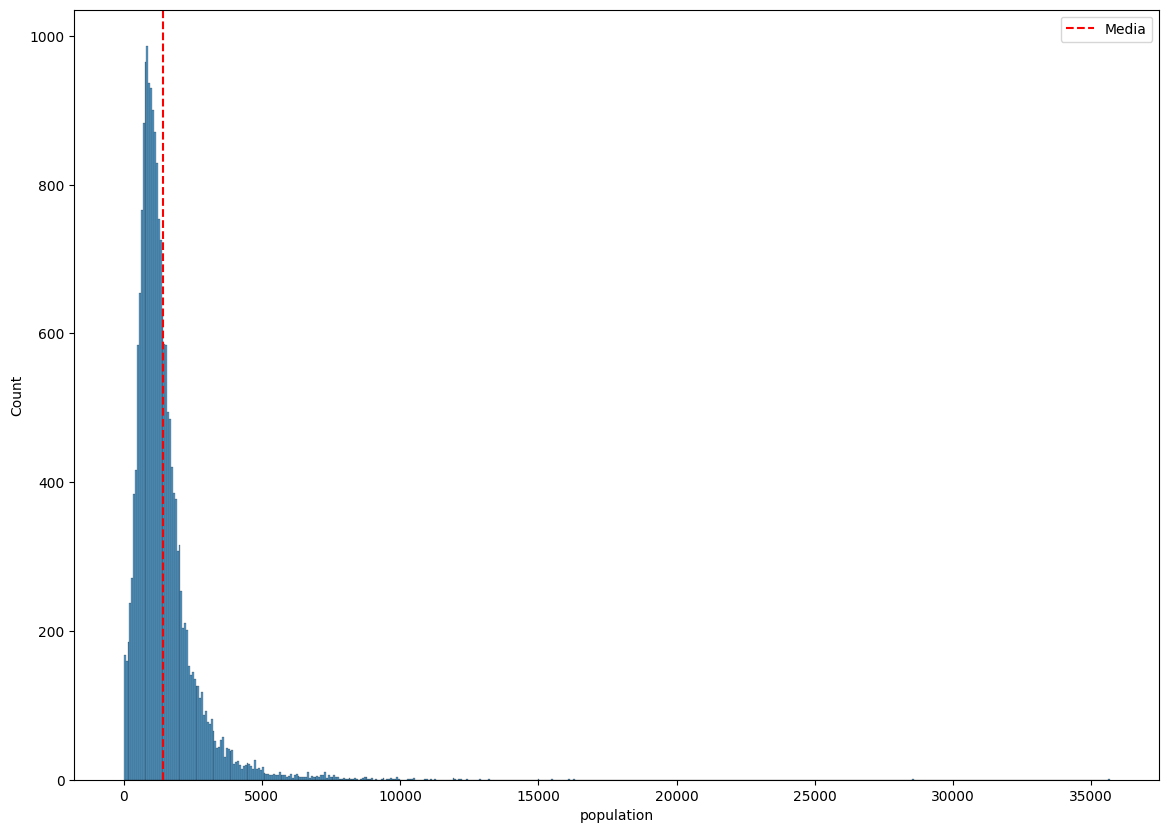

In [ ]:
#Hago un Histograma de la poblacion
plt.figure(figsize=(14, 10))

sns.histplot(
    data=df_completada,
    x= 'population'
    )

#Ubico la media aqui
plt.axvline(
    x=df_completada['population'].mean(),
    color='red',
    linestyle='dashed',
    label='Media'
)

#plt.xscale('log')
plt.legend()
plt.show()

Como se puede observar buena parte de la poblacion de diferente bloques se encuentra entre los 100 y las 4000 personas. Sin embargo los datos a partir de alli estan muy dispersos y hay igualmente muchos datos en zonas que podrian ser considerados outliers. Entre 5000 y hasta 35000, sin embargo cuando investigue la forma como estos datos fueron tomados es totalmente logica que exista estan grandes diferencias en poblacion entre bloques. Porque un distrito que es la unidad basica en la cual se basan cada uno de los bloques/lineas de nuestra dataset es un espacio en el territorio, no necesariamente es una separación politica. Es decir puede haber distritos en zonas muy rurales y parque nacionales lo cual hace totalmente posible que haya entre 3 - 100 personas. Sin embargo hay bloques que contienen partes de una ciudad en los cuales es totalmente logico que se contabilicen 35000 personas.

<Axes: xlabel='ocean_proximity', ylabel='population'>

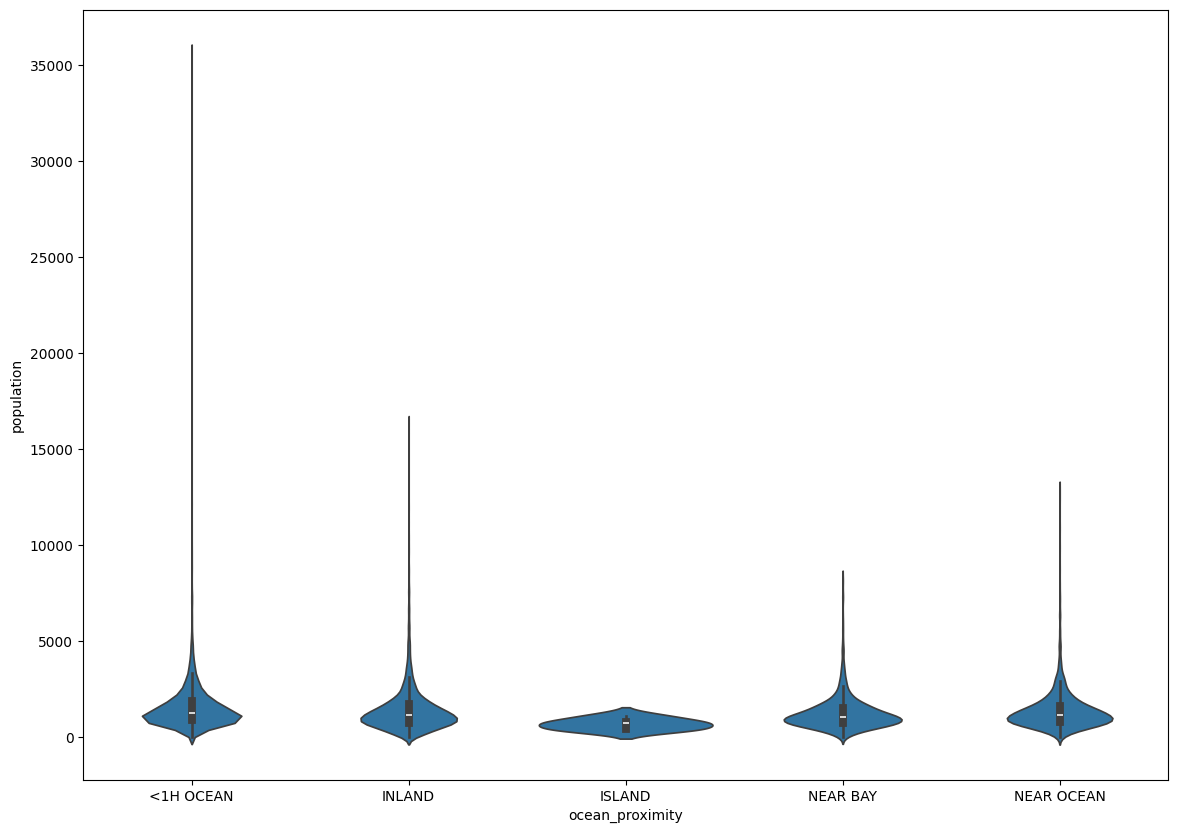

In [ ]:
#Grafico de violin para correlacionar las variables Ocean Proximity y Population
plt.figure(figsize=(14, 10))
sns.violinplot(
    data= df_completada,
    x= 'ocean_proximity',
    y= 'population'
)


Aqui no se observa una correlacion entre la cercania al oceano y la densidad poblacional. Hay que filtrar los puntos con menor poblacion y los puntos con mayor poblacion y ver si siguen un patron.

##7.0 Analisis mas profundo

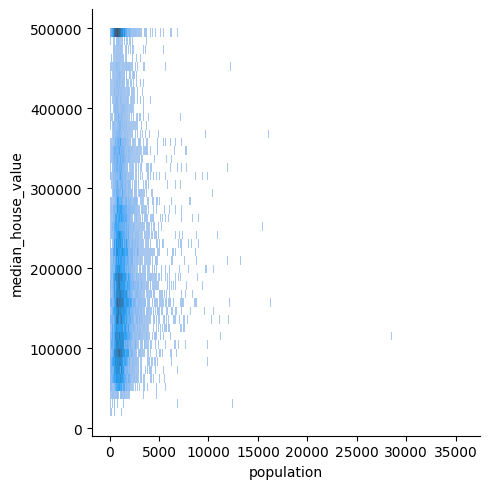

In [ ]:
#Correlaciono las variables de population y median_house_value
sns.displot(
    data= df_completada,
    x= 'population',
    y= 'median_house_value'
)


Se nota que no existen casas baratas (precios mas bajos) en las zonas de mayor densidad poblacional.

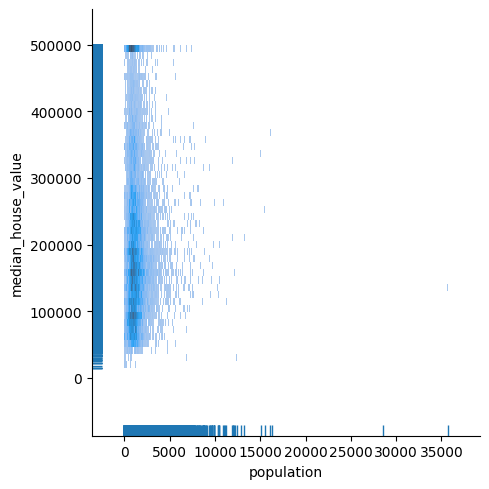

In [ ]:
#Pruebo al grafico anterior con algunas modificaciones
sns.displot(
    data=df_completada,
    x='population',
    y='median_house_value',
    rug=True
)

Este grafico con la funcion Rug=True es mas conveniente al momento de comparar porque me genera un histograma tambien de acuerdo a los valores donde se encuentran datos

In [ ]:
#Buscar correlaciones con las variables categoricas

df_completada_categorica = (
    df_completada
    .assign(
        ocean_proximity_cat=lambda df: df.ocean_proximity.replace(
            {
                '<1H OCEAN': 1,
                'INLAND': 2,
                'NEAR OCEAN': 3,
                'NEAR BAY': 4,
                'ISLAND': 5
            }
        )
    )
)


/tmp/ipython-input-3231863408.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ocean_proximity_cat=lambda df: df.ocean_proximity.replace(
/tmp/ipython-input-3231863408.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  ocean_proximity_cat=lambda df: df.ocean_proximity.replace(


<Axes: >

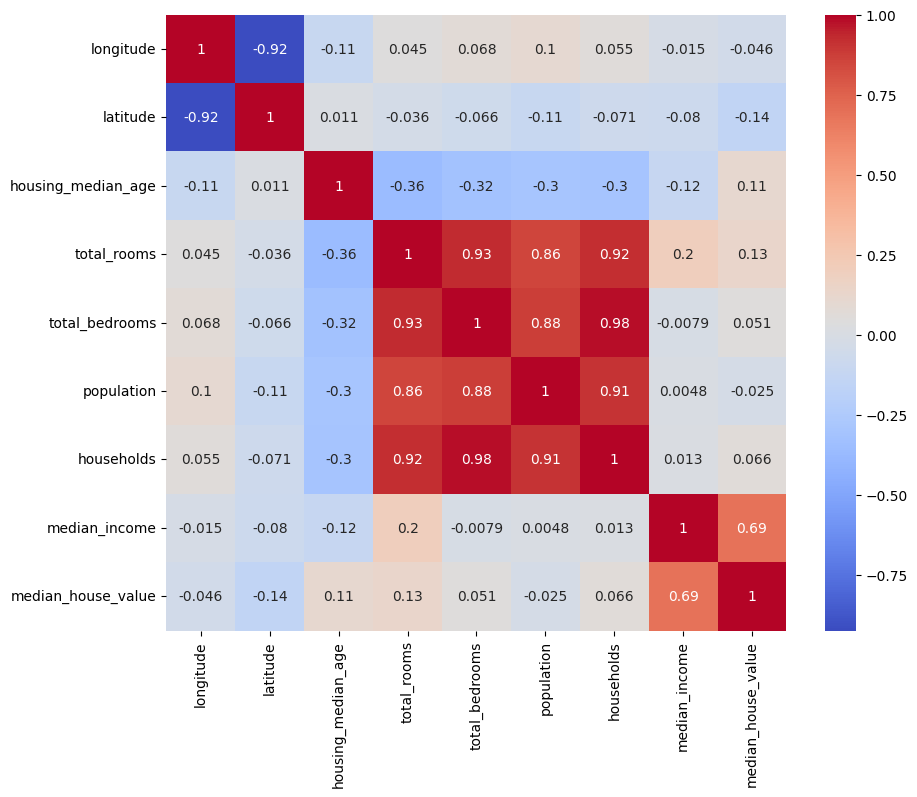

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_completada_categorica.select_dtypes(include=np.number).corr(),
    annot=True,
    cmap='coolwarm'
)


### 7.1 Estableciendo Relaciones: Analisis de Regresion Simple

###

In [ ]:
#Esta es una forma un poco manual de hacerlo
#importo la libreria necesaria
import scipy.stats

#Con este metodo obtengo la regresion lineal, guardo en una variable
regresion_lineal_simple_medianIncome_medianHouseValue = scipy.stats.linregress(x=df_completada['median_income'], y=df_completada['median_house_value'])
display(regresion_lineal_simple_medianIncome_medianHouseValue)


LinregressResult(slope=np.float64(41793.849201896264), intercept=np.float64(45085.57670326799), rvalue=np.float64(0.6880752079585482), pvalue=np.float64(0.0), stderr=np.float64(306.8057538867836), intercept_stderr=np.float64(1322.8716177148078))

<Axes: xlabel='median_income', ylabel='median_house_value'>

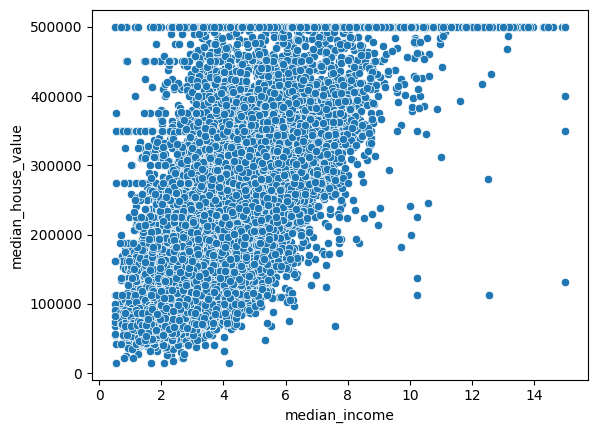

In [ ]:
#Primero hago el grafico de puntos
sns.scatterplot(
    data=df_completada,
    x='median_income',
    y='median_house_value'
)


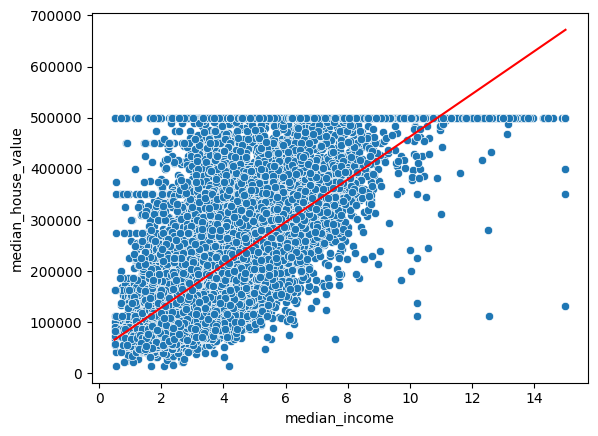

In [ ]:
#Grafico la linea que representa la regresion lineal
sns.scatterplot(
    data=df_completada,
    x='median_income',
    y='median_house_value'
)
fx_1 = np.array([df_completada.median_income.min(), df_completada.median_income.max()])
fy_1 = regresion_lineal_simple_medianIncome_medianHouseValue.intercept + regresion_lineal_simple_medianIncome_medianHouseValue.slope * fx_1
plt.plot(fx_1, fy_1, color='red')
plt.show()


La regresion lineal muestra claramente que la variable del ingreso medio afecta claramente al valor de la casa o visceversa.


### 7.2 Regresion lineal con otras variables y con Seaborn

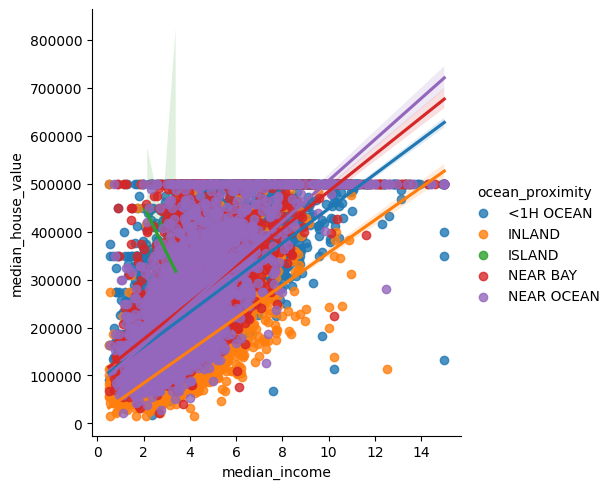

In [ ]:
#Con SNS
sns.lmplot(
    data=df_completada,
    x='median_income',
    y='median_house_value',
    hue='ocean_proximity'
)
plt.show()

### 7.3  Regresion lineal con datos limpios de precio. Ver si es diferente al limpiar esos datos.

La intencion es limpiar el censored data para de esa manera obtener una regresion lineal mas acertada. Alcualmente he detectado topes en las variables en cuestion:


*   median_income: Tiene como tope 15.0001
*   median_house_value: Tiene como tope USD 501000



#### 7.3.1 Verifico cantidad de datos en areas censuradas

In [ ]:
#Cantidades el la barrera de los censurados
cantidad_bloques_medianIncome_censured = (df_completada['median_income'] >= 15.0001).sum()
cantidad_bloques_medianHouseValue_censured = (df_completada['median_house_value'] >= 500001).sum()

#Muestro Resultado
print(f'Bloques con median_income censured: {cantidad_bloques_medianIncome_censured}')
print(f'Bloques con median_house_value censured: {cantidad_bloques_medianHouseValue_censured}')


Bloques con median_income censured: 49
Bloques con median_house_value censured: 965


Veo que las proporciones a limpiar para este analisis es menos cercano al 5%. Lo cual es asumible para este analisis concreto.

La accion sera crear un df temporal para este calculo, no una limpieza definitiva.

In [ ]:
#Creacion de nuevo DF
df_completada_excluidos_censurados = df_completada[(df_completada['median_income'] < 15.0001) & (df_completada['median_house_value'] < 500001)]

#Verifico
len(df_completada_excluidos_censurados)

19672

Ahora tengo un df con 19672 bloques donde ya no figuran los bloques con datos censurados. Procedo a hacer la regresion lineal.

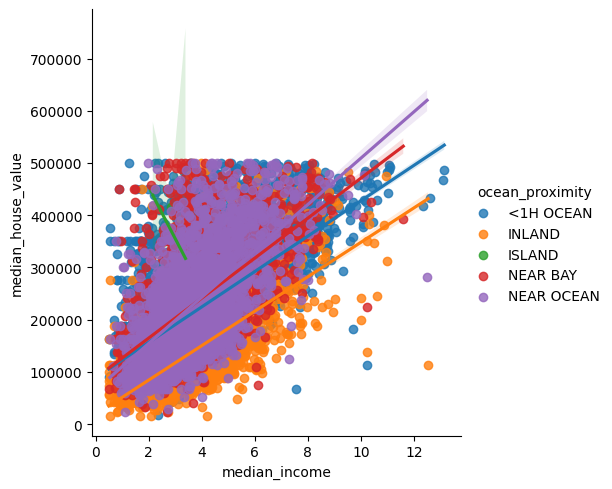

In [ ]:
#Regresion Lineal
sns.lmplot(
    data=df_completada_excluidos_censurados,
    x='median_income',
    y='median_house_value',
    hue='ocean_proximity'
)

plt.show()


Con los datos corregidos este grafico indica las siguientes comclusiones:


*   Las lineas con mayor pendiete son de bloques categorizados como Near_Ocean y Near_Bay respectivamente, lo cual parece sugurir que el zonas cercanas a la costa tienen mayor diferencia de precio y mas afecta el ingreso en el valor de la casa. Esto podria deberse a los siguientes factores:


      *   Tierra limitada: La costa es una sola y cada espacio directamnete con espacio de playa seguramente tiene propiestario. Esto genera mayor demanda y la oferta se mantiene estable.
      *   Lujo: En zonas costeras normalmente hay mas casas de lujo.Las personas con mayores ingresos pueden pagar casas mas costosas.


*   Por otro lado los bloques categorizados como mas Inland y '<1H_Ocean' respectivamente tienen una dependencia del ingreso menor. Lo cual probablemente se explica por menores precios relativos de las casas en ese lugar   
* En el caso de las Islas probablemente no hay suficientes datos y es una pendiente poco representativa.





Voy a proceder a comparar numericamente estos resultados con los resultados antes de limpiar los datos

In [ ]:
#Datos generales comparativo

#Regresion lineal general con dataframe nuevo
regresion_lineal_simple_medianIncome_medianHouseValue_excluidos_censurados = scipy.stats.linregress(
    x=df_completada_excluidos_censurados['median_income'],
    y=df_completada_excluidos_censurados['median_house_value']
)

# Crear un diccionario con los datos
datos_comparar = {
    'Parametros': ['Slope', 'Intercept', 'R-value', 'P-value'],
    'Original': [regresion_lineal_simple_medianIncome_medianHouseValue.slope,
                 regresion_lineal_simple_medianIncome_medianHouseValue.intercept,
                 regresion_lineal_simple_medianIncome_medianHouseValue.rvalue,
                 regresion_lineal_simple_medianIncome_medianHouseValue.pvalue],
    'Sin Datos Censurados': [regresion_lineal_simple_medianIncome_medianHouseValue_excluidos_censurados.slope,
                             regresion_lineal_simple_medianIncome_medianHouseValue_excluidos_censurados.intercept,
                             regresion_lineal_simple_medianIncome_medianHouseValue_excluidos_censurados.rvalue,
                             regresion_lineal_simple_medianIncome_medianHouseValue_excluidos_censurados.pvalue]
}

# Crear el DataFrame
df_comparacion = pd.DataFrame(data=datos_comparar)

#Agrego la diferencia
df_comparacion['Diferencia']= df_comparacion['Sin Datos Censurados'] - df_comparacion['Original']


In [ ]:
df_comparacion

Parametros      Original  Sin Datos Censurados   Diferencia
0      Slope  41793.849202          40235.156222 -1558.692980
1  Intercept  45085.576703          44598.673486  -486.903218
2    R-value      0.688075              0.644152    -0.043923
3    P-value      0.000000              0.000000     0.000000

Los resultados son diferentes a lo que esperaba, esperaba un mayor Slope y un mayor R-value, indicando mayor dependencia y correlacion respectivamente. Se notan principalmente dos diferencias:


*   Slope: Con los datos corregidos bajo, lo cual quiere decir que la afectacion de una variable a la otra es menor. Por cada aumento de 1000 dolares en el ingreso el valor de la casa se incrementa en 44598 Dolares.
*   R-value: Bajo un poco la correlacion, indicando que estos valores censurados en el tope forzaban la correlacion. Al quitarlos porbablemente los datos reales quedan mas dispersos.



Sin embargo, no limpie los resultados al princio, verifico si al inicio del dataset tambien hay datos censurados para estas dos variables.

In [ ]:
#Minimos de median_income y median_house_value
df_completada[['median_income', 'median_house_value']].min()

median_income             0.4999
median_house_value    14999.0000
dtype: float64

Veo valores sospechosamente redondos, es decir con terminacion 9999. Verifico cuantos valores hay en este rango.

In [ ]:
#Valores en el rango minimo
minIncome = (df_completada['median_income'] <= 0.5).sum()
minHause = (df_completada['median_house_value'] <= 15000).sum()

print(f'Bloques con median_income en el rango minimo: {minIncome}')
print(f'Bloques con median_house_value en el rango minimo: {minHause}')

Bloques con median_income en el rango minimo: 12
Bloques con median_house_value en el rango minimo: 4


Realmente son pocos, no vale la pena hacer limpieza por 18 bloques, no tendran una gran afectacion en el resultado final

###7.4 Promediar y hacer medias de cada una de las categorias de las casas.

Mi hipotesis es que las casas cerca del oceano son mas caras.

In [ ]:
#Separo las casas por categoria
df_completada.groupby('ocean_proximity')['median_house_value'].mean()



/tmp/ipython-input-1671361226.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_completada.groupby('ocean_proximity')['median_house_value'].mean()


ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

Efectivamente se ve la diferencia en la mediana a medida que se acerca al oceano. Lo grafico para verlo mejor.

/tmp/ipython-input-1978206978.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana = df_completada.groupby('ocean_proximity')['median_house_value'].median().sort_values()
/tmp/ipython-input-1978206978.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media = df_completada.groupby('ocean_proximity')['median_house_value'].mean().sort_values()


<Axes: xlabel='Distancia al Oceano', ylabel='Precio'>

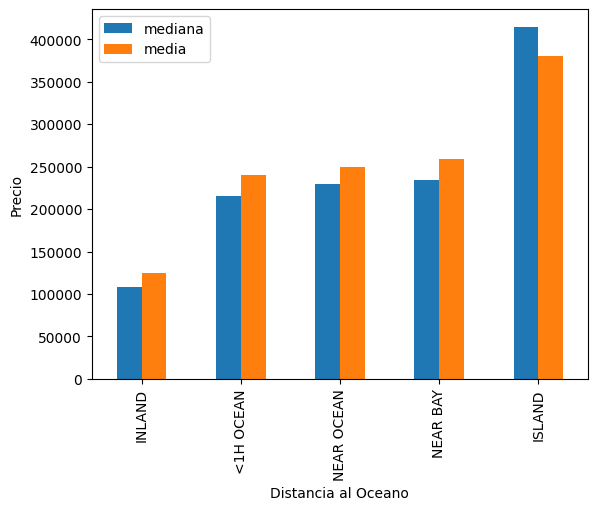

In [ ]:
#Grafico la diferencia
mediana = df_completada.groupby('ocean_proximity')['median_house_value'].median().sort_values()

media = df_completada.groupby('ocean_proximity')['median_house_value'].mean().sort_values()

pd.DataFrame({
    'mediana': mediana,
    'media': media
}).plot(
    kind= 'bar',
    xlabel= 'Distancia al Oceano',
    ylabel= 'Precio')

Se observa mucho mejor la correlacion entre el precio de la casas y la cercania al oceano.

### 7.5 Regresion lineal de median_house_value y population.

Ver que tanto se correlacionan

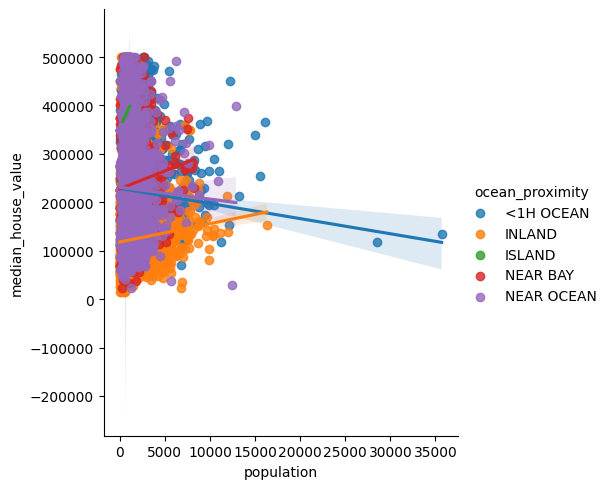

In [ ]:
#Grafico Regresion lineal - Variable independiente: Population
sns.lmplot(
    data=df_completada_excluidos_censurados,
    x='population',
    y='median_house_value',
    hue='ocean_proximity'
)
plt.show()


En el grafico no parece haber mucha correlacion ni dependencia, voy a cambiar la variable independiente y a hacer el calculo numerico.

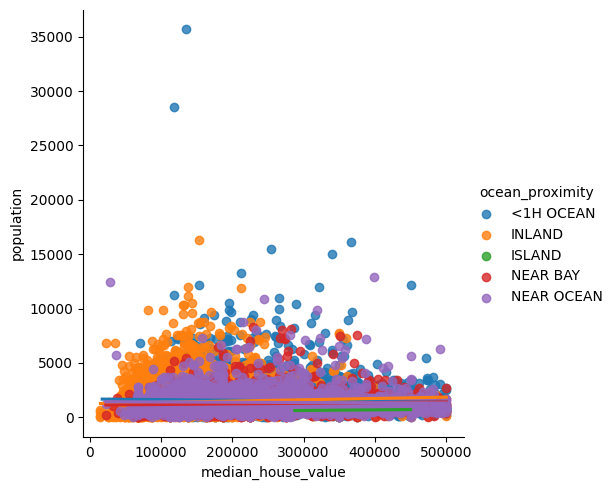

In [ ]:
#Grafico Regresion Lineal - Variable independiente Median House Value
sns.lmplot(
    data= df_completada_excluidos_censurados,
    x='median_house_value',
    y='population',
    hue='ocean_proximity'
)
plt.show()

In [ ]:
#Regresion lineal (numeros)
scipy.stats.linregress(
    x=df_completada_excluidos_censurados['population'],
    y=df_completada_excluidos_censurados['median_house_value']
)

LinregressResult(slope=np.float64(1.0393191123978578), intercept=np.float64(190964.7874848557), rvalue=np.float64(0.012165456667517694), pvalue=np.float64(0.08796265314814569), stderr=np.float64(0.6090966036206904), intercept_stderr=np.float64(1120.5261282951772))

Si, definitivamente esto no tiene influencia en el precio.

#**Conclusiones**

###El DataSet:


*   Estaba bastante limpio y habia poco que limpiar o mejorar.
*   La muestra es al 100% representativa y fiel de los datos del estado de california para la fecha de estudio.
*   Los bloques representan zonas, espacios geofraficos de california. Entonces, cada linea se debe entender de esa manera.


###El costo de las casas en California.

En base a la exploracion realizada se puede comcluir que hay tres factores que inciden principalmente en el costo de las casas en California:

*   La distancia al Oceano, este es uno de los puntos con mayor incidencia. A medida que nos acercamos al oceano el costo se incrementa.

*   Ingreso medio, es logico y esperable. La exploracion demostro que a medida que aumenta el ingreso el costo de las casas es mayor.
*   Ciudades, es el tercer factor que influye. Las casas en zonas mas rurales son mas economicas.

